<a href="https://colab.research.google.com/github/Aragnzlz/PROJECTS/blob/main/DISTRIBUCIONES_DE_UNA_SERIE_TEMPORAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Tratamiento de datos
# ==============================================================================
!pip install astral # Installing the astral package
!pip install skforecast # Installing the skforecast package
import numpy as np
import pandas as pd
from astral.sun import sun # This import should now work
from astral import LocationInfo
from skforecast.datasets import fetch_dataset

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from skforecast.plot import plot_residuals
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size':8})

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Versión skforecast: {skforecast.__version__}")
print(f"{color}Versión scikit-learn: {sklearn.__version__}")
print(f"{color}Versión lightgbm: {lightgbm.__version__}")
print(f"{color}Versión pandas: {pd.__version__}")
print(f"{color}Versión numpy: {np.__version__}")

Versión skforecast: 0.14.0
Versión scikit-learn: 1.5.2
Versión lightgbm: 4.5.0
Versión pandas: 2.2.2
Versión numpy: 1.26.4


In [7]:
# Cargar datos desde un archivo Excel
datos = pd.read_excel('AFLUENCIA_2023.xlsx')
datos #Imprimir datos

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module

,FECHA,AFLUENCIA
0,2023-01-01,45541
1,2023-01-02,128298
2,2023-01-03,147638
3,2023-01-04,154646
4,2023-01-05,166177
...,...,...
665,2024-10-27,93165
666,2024-10-28,185470
667,2024-10-29,203048
668,2024-10-30,203777


In [8]:
# Conversión del formato fecha
# ==============================================================================
datos['FECHA'] = pd.to_datetime(datos['FECHA'], format='%d/%m/%Y')
datos = datos.set_index('FECHA')
datos.head(2)

,AFLUENCIA
FECHA,
2023-01-01,45541
2023-01-02,128298


<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module

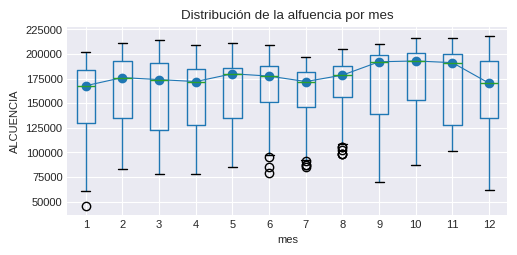

In [10]:
# Distribución de la demanda por mes
# ==============================================================================
fig, ax = plt.subplots(figsize=(5.5, 2.5))
datos['mes'] = datos.index.month
datos.boxplot(column='AFLUENCIA', by='mes', ax=ax,)
datos.groupby('mes')['AFLUENCIA'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('ALCUENCIA')
ax.set_title('Distribución de la alfuencia por mes')
fig.suptitle('');

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



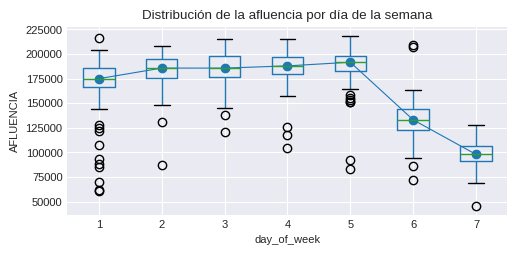

In [11]:
# Distribución de la demanda por día de la semana
# ==============================================================================
fig, ax = plt.subplots(figsize=(5.5, 2.5))
# Create a temporary column for the day of the week to avoid ambiguity.
datos['day_of_week'] = datos.index.day_of_week + 1
datos.boxplot(column='AFLUENCIA', by='day_of_week', ax=ax) # Use the temporary column for grouping.
datos.groupby('day_of_week')['AFLUENCIA'].median().plot(style='o-', linewidth=0.8, ax=ax) # Use the temporary column here too.
ax.set_ylabel('AFLUENCIA')
ax.set_title('Distribución de la afluencia por día de la semana')
fig.suptitle('');